## This is an ongoing project. I started it from scratch. Check back later for most up-to-date analysis.

In [1]:
## Current goal
## -- figure out how the datasets are connected

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style='darkgrid')
%matplotlib inline


df = pd.read_csv('data.csv')
df_artist = pd.read_csv('data_by_artist.csv')
df_genres = pd.read_csv('data_by_genres.csv')
df_year = pd.read_csv('data_by_year.csv')
df_w_genres = pd.read_csv('data_w_genres.csv')



print("Dataframe -- combined")
print(df.info())
print("\n\n\n\n")
print("Dataframe -- artist")
print(df_artist.info())
print("\n\n\n\n")
print("Dataframe -- genres")
print(df_genres.info())
print("\n\n\n\n")
print("Dataframe -- year")
print(df_year.info())
print("\n\n\n\n")
print("Dataframe -- with genres")
print(df_w_genres.info())
print("\n\n\n\n")

Dataframe -- combined
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16

# 1. Exploring the artist dataset

In [2]:
df_artist.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


### Interesting features- Acousticness, energy, instrumentalness, liveliness. What are some of loudest bands then?


In [3]:
df_artist.sort_values(by=['loudness'], ascending=False)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
22600,0,2,0.0104,Simian,0.615,262773.0,0.97000,0.384,0.178,1.342,0.1190,122.993,0.507000,61.0,9
24465,1,2,0.9250,The Calypso Orchestra,0.502,157893.0,0.77500,0.000,0.152,0.474,0.0680,51.668,0.967000,0.0,0
9098,1,1,0.9250,Gerald Clark,0.502,157893.0,0.77500,0.000,0.152,0.474,0.0680,51.668,0.967000,0.0,0
20364,1,2,0.5090,Ramesh Yaduan,0.606,198072.0,0.99700,0.000,0.656,0.418,0.3630,74.994,0.673000,0.0,10
5309,1,2,0.7160,Cyril Blake's Calypso Serenaders,0.548,193307.0,0.90900,0.000,0.216,0.200,0.2020,90.024,0.890000,1.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18314,1,2,0.9080,Noise Makers,0.383,166000.0,0.13800,0.973,0.105,-51.123,0.0469,137.211,0.036000,59.0,2
7913,0,2,0.9620,Fabricants,0.000,175680.0,0.00002,0.028,0.137,-52.220,0.0000,0.000,0.000000,57.0,11
9868,1,2,0.9080,HI-FI CAMP,0.000,156805.0,0.61600,0.388,0.110,-54.376,0.0000,0.000,0.000000,68.0,1
16241,0,2,0.9400,Mark Biem,0.153,198611.0,0.04430,0.948,0.133,-54.837,0.0771,139.449,0.000562,58.0,10


### Okay, let's just extract the top 10. 

In [4]:
df_artist.sort_values(by=['loudness'], ascending=False)['artists'].head(10)

22600                              Simian
24465               The Calypso Orchestra
9098                         Gerald Clark
20364                       Ramesh Yaduan
5309     Cyril Blake's Calypso Serenaders
1780                           Atmozfears
6109                           Demi Kanon
7522                             Endymion
2237                         Bass Chaserz
25228                           The Moors
Name: artists, dtype: object

In [5]:
# Who are the most popular?
df_artist.sort_values(by=['popularity'], ascending=False)['artists'].head(10)

20966        Ritt Momney
14354          Lele Pons
15070    Los Legendarios
11764           Jerry Di
28263        salem ilese
23687          Surf Mesa
7463              Emilee
213                  A7S
26318               Towy
16453          Master KG
Name: artists, dtype: object

### Don't know any of them. What's wrong? Lets's drop the fancy coding, and check manually. 

In [6]:
df_artist.sort_values(by=['popularity'], ascending=False).head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
20966,0,2,0.0563,Ritt Momney,0.399,210463.0,0.491,0.000890,0.110,-10.778,0.0538,91.066,0.151,93.0,6
14354,1,1,0.0907,Lele Pons,0.905,155825.0,0.686,0.000000,0.266,-3.152,0.0664,103.013,0.963,92.0,0
15070,0,2,0.3100,Los Legendarios,0.823,213314.0,0.821,0.000004,0.143,-3.402,0.1660,99.999,0.791,90.0,8
11764,1,2,0.8190,Jerry Di,0.854,197587.0,0.525,0.000000,0.146,-4.426,0.2140,97.054,0.630,89.0,1
28263,1,2,0.4240,salem ilese,0.738,136839.0,0.621,0.000007,0.692,-7.313,0.0486,113.968,0.715,88.0,0


### Nothing wrong with what I did. This frame is sorted by popularity and the artist names match. Am I totally unaware of the music scene? NOT really. If we consider the song counts of the most popular artist "Ritt Momney", we see that he has only 2 songs listed. It is possible the those 2 songs were very popular, but does that make him the most polular artist? Perhaps not. We may opt for a minimum song count criteria to solve this problem. We can consider artists with a minimum of 50 songs released, or  maybe 100. We can decide that after looking at a few more statistics.



### Now lets look at the artist who has the most songs listed in this dataset?

In [7]:
df_artist.sort_values(by=['count'], ascending=False).head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
8367,1,3169,0.984282,Francisco Canaro,0.659676,176986.345850,0.287555,0.537988,0.199492,-12.043738,0.110533,122.743169,0.745212,0.061849,2
28561,1,2422,0.353916,Эрнест Хемингуэй,0.696773,115936.962015,0.188971,0.000027,0.373329,-18.237630,0.926229,111.847911,0.583885,0.066061,11
28560,1,2136,0.297365,Эрих Мария Ремарк,0.693738,121013.185393,0.200289,0.000230,0.195630,-19.259112,0.921277,110.717091,0.536381,0.000000,0
8434,1,1459,0.738865,Frank Sinatra,0.385232,189282.134339,0.236152,0.021148,0.230828,-14.335969,0.049029,109.394801,0.364991,28.658670,5
10714,1,1256,0.985169,Ignacio Corsini,0.545475,154560.711783,0.187842,0.425159,0.182707,-20.862591,0.121051,106.514583,0.638670,0.031847,5


<AxesSubplot:ylabel='Frequency'>

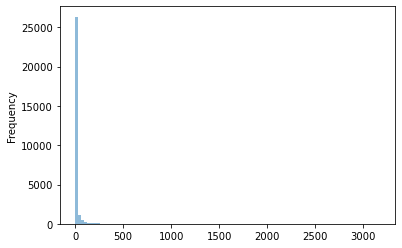

In [8]:
df_artist['count'].plot.hist(bins=100, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

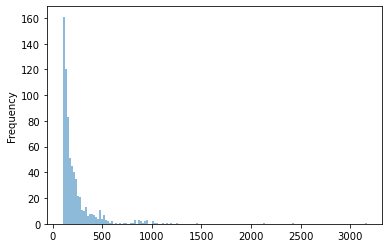

In [9]:
(df_artist[df_artist['count'] >= 100])['count'].plot.hist(bins=150, alpha=0.5)

### Now we are only considering artists who have released 50 or more songs. This might be a good estimate as 50 songs are roughly equivalent to 5 albums. It also makes sense to drop the artists with 50 songs or less. Sure we are going to miss out the one hit wonder stars and emerging artists. But we are looking for patterns. In that context, dropping them make sense.

In [10]:
df_artist_prolific = df_artist[df_artist['count'] >= 50]
df_artist_prolific.sort_values(by=['popularity'], ascending=False).head(10)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
10090,1,52,0.268816,Harry Styles,0.541462,238180.230769,0.586769,0.016809,0.156208,-6.386923,0.035888,114.687000,0.406896,78.346154,5
2705,0,75,0.620989,Billie Eilish,0.623053,201196.346667,0.351523,0.099684,0.173147,-11.793653,0.132127,118.662467,0.266849,76.893333,4
19880,1,52,0.221898,Pop Smoke,0.681904,175539.980769,0.642346,0.000133,0.198096,-6.309538,0.248098,120.090000,0.436519,75.634615,7
15873,0,53,0.195461,Maluma,0.756321,214181.207547,0.765151,0.000026,0.140342,-4.190811,0.150066,132.472132,0.706428,74.547170,6
12799,1,184,0.206264,Juice WRLD,0.667277,181859.043478,0.612038,0.002599,0.222840,-6.808033,0.164856,132.535457,0.438570,73.695652,6
19910,1,109,0.289420,Post Malone,0.640917,207217.990826,0.617404,0.000150,0.143071,-5.683853,0.082183,123.594220,0.366394,72.908257,0
25040,1,66,0.165056,The Kid LAROI,0.643455,147159.227273,0.608818,0.000000,0.194311,-6.086636,0.134724,117.041106,0.418394,72.893939,6
6795,0,58,0.122589,Dua Lipa,0.693362,206251.000000,0.695086,0.000110,0.180390,-5.029241,0.088105,116.538172,0.578793,72.672414,6
3855,1,58,0.157233,Cardi B,0.825224,211658.706897,0.659190,0.000356,0.149500,-5.688603,0.193466,130.186517,0.522603,71.689655,1
1465,1,91,0.335587,Anuel AA,0.746176,245345.472527,0.704692,0.000424,0.151854,-4.591121,0.115131,119.790901,0.576341,71.362637,8


### We finally see Billie Eilish in the list. Great!

### Let's crete a pie chart of the top 10 most prolific artists. The chart shows how many of their songs are there in this dataset. It is not a measure of their popularity, rather how prolific they are/ were.

<AxesSubplot:ylabel='artist'>

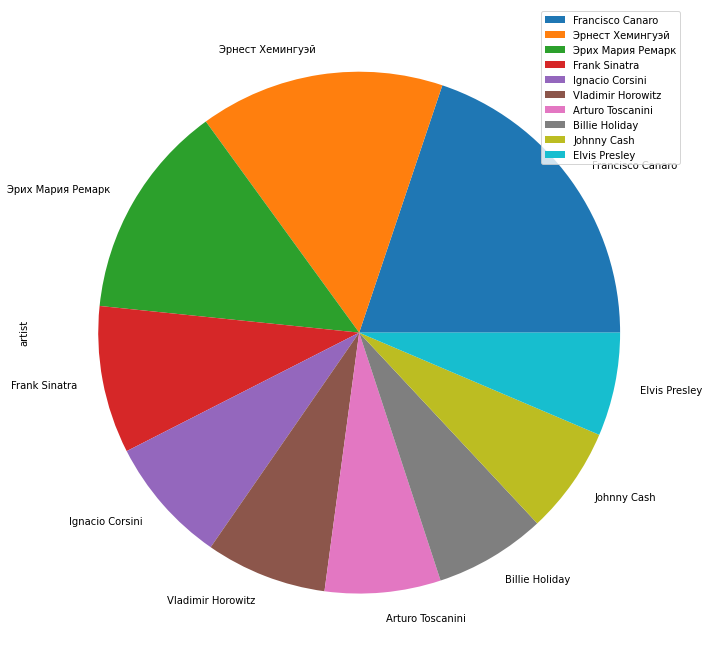

In [11]:
top_10_artists_df = df_artist_prolific.sort_values(by=['count'], ascending=False).head(10)
df_plt = pd.DataFrame({'artist': top_10_artists_df['count'].values}, index = top_10_artists_df['artists'].values)

df_plt.plot.pie(y='artist',figsize=(12,12))

### Who is Francisco Canaro? I got curious. He was a Uruguayan violinist and tango orchestra leader. Didn't know. 

[Wikipedia Link on Francisco Canaro](https://en.wikipedia.org/wiki/Francisco_Canaro)


### Now we can ask some interesting questions. For example, what are the common features among the top 10 most popular artists? Let's find out.

<AxesSubplot:>

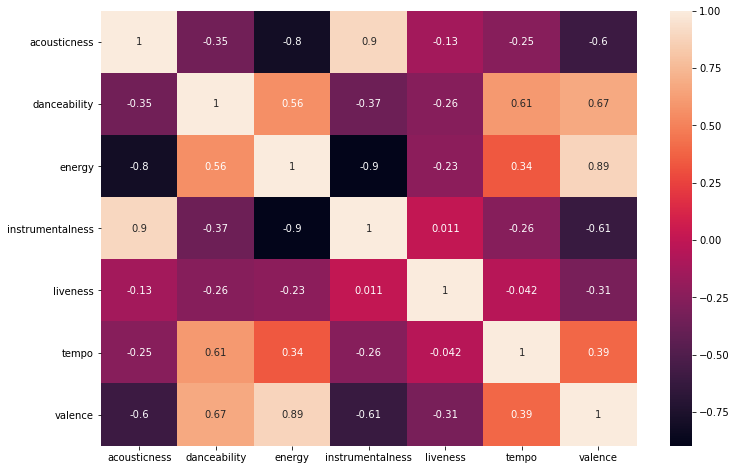

In [12]:
df_top_10_pop_artists = df_artist_prolific.sort_values(by=['popularity'], ascending=False).head(10)

df_correlated_features = df_top_10_pop_artists[['acousticness','danceability','energy',
                                                'instrumentalness','liveness','tempo','valence']].corr()

plt.figure(figsize=(12,8))
sns.heatmap(df_correlated_features, annot=True)


### Some observations

* Instrumental music is highest in acousticness. No surpirse there. Highly acoustic music also seem to be least danceable.

* Danceable music seem to most valent, but least instrumental. This seems a bit confusing. Many electronic music is also just instrumental. It would be better if the dataset had broken down the instrumentalness feature into acoustic instrumental and electronic.

* Danceable music has the highest tempo. Again no surprise there.

In [13]:
df_genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [14]:
df_genres.sort_values(by=['instrumentalness'], ascending=False)['genres'].head(10)

2958                                yoga
1854                     musica de fondo
2552                                 spa
1784                         mindfulness
2476                        singing bowl
336     brazilian contemporary classical
1675                         lo-fi house
1248                             guzheng
912                dutch classical piano
535              chinese classical piano
Name: genres, dtype: object

### This time it matches with what I expected. Also, need to try Dutch and Chinese classical piano.


### Now, what is that Year dataset?

In [15]:
df_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [16]:
df_w_genres.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [17]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


### Things have been boring so far. Let's write some code to find artists post 2000. Current goal is to write a function which will accept genre as a parameter and return the top 5 artists in that genre post 2000.

<AxesSubplot:>

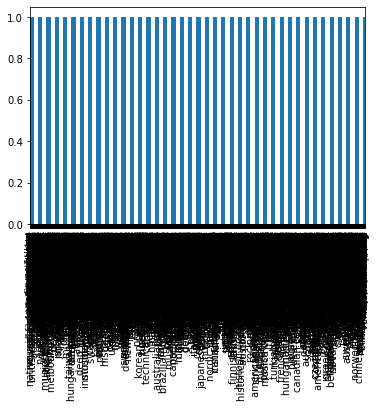

In [18]:
df_genres.genres.value_counts().plot(kind='bar')

# Hard to read. Let's just observe the top 10.

<AxesSubplot:>

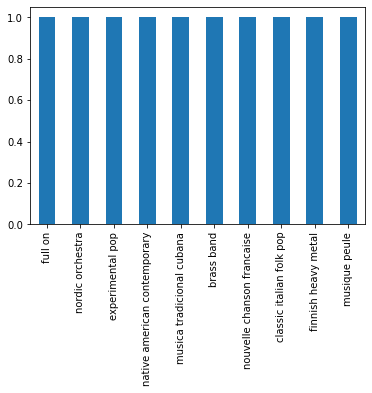

In [19]:
df_temp = df_genres.genres.value_counts()
df_temp.head(10).plot(kind='bar')

### Let's find out top artists in each genre. For that, we will use the df_w_genres dataframe
#### But wait, looks like there are missing values.

In [20]:
df_w_genres.shape

(28680, 16)

In [21]:
df_filtered = df_w_genres[df_w_genres['genres'] != '[]']
df_filtered.shape

(18823, 16)

### Too many rows had genres missing. We will work with what we have.

In [22]:
df_filtered.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
8,"['comedy rock', 'comic', 'parody']","""Weird Al"" Yankovic",0.173145,0.662787,218948.196721,0.695393,0.000050,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9,1,122
9,"['emo rap', 'florida rap', 'sad rap', 'undergr...",$NOT,0.544467,0.789800,137910.466667,0.532933,0.023063,0.180300,-9.149267,0.293687,112.344800,0.480700,67.533333,1,1,15
10,"['dark trap', 'meme rap']",$atori Zoom,0.239000,0.883000,141519.000000,0.625000,0.000000,0.076500,-4.098000,0.245000,126.677000,0.871000,67.000000,6,1,2
12,"['asian american hip hop', 'cali rap', 'west c...",$tupid Young,0.148100,0.854000,190572.000000,0.683000,0.000002,0.188500,-6.997000,0.221000,100.724500,0.625500,57.500000,1,1,2


In [23]:
df_filtered.genres.value_counts().head(100)

['movie tunes']                            69
['show tunes']                             63
['hollywood']                              56
['orchestral performance']                 50
['broadway', 'hollywood', 'show tunes']    48
                                           ..
['alternative r&b']                        14
['easy listening']                         14
['chanson']                                14
['chamber orchestra']                      14
['haitian traditional']                    14
Name: genres, Length: 100, dtype: int64

### We can find out artists with most songs. 